In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import flamespread as fs
import dataset_handler as dh
#reload
%load_ext autoreload

%autoreload 2

In [4]:
exp_name = 'lfs_pmma_DE_6mm_tc_R1_0001'
target_width = 800
target_height= 400
conversion = True

In [3]:


def get_data(exp_name):
    dewarped_data= dh.get_dewarped_data(exp_name)[:]
    edge_results = dh.get_edge_results(exp_name)[:]
    dh.close_file()
    return dewarped_data, edge_results

def get_frame(exp_name, frame):
    dewarped_data_frame= dh.get_dewarped_data(exp_name)[:,:,frame]
    edge_results_frame = dh.get_edge_results(exp_name)[frame]
    dh.close_file()
    return dewarped_data_frame, edge_results_frame

def get_edge_results(exp_name):
    edge_results = dh.get_edge_results(exp_name)[:]
    dh.close_file()
    return edge_results


In [27]:
def compare_two_experiments(exp1, exp2,y_cutoff = 0.5):
    edge_results1 = get_edge_results(exp1)
    edge_results2 = get_edge_results(exp2)
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 10)
    y1 = int(edge_results1.shape[1]*y_cutoff)
    y2 = int(edge_results2.shape[1]*y_cutoff)
    y1 = -y1 -1
    y2 = -y2 -1
    if conversion:
        width1,height1 = dh.get_dewarped_data(exp1).shape[1:]
        width2,height2 = dh.get_dewarped_data(exp2).shape[1:]
        dh.close_file()
        edge_results1 = edge_results1 * target_width/width1
        edge_results2 = edge_results2 * target_width/width2
        
    ax.plot(edge_results1.T[y1,::2],label='R1 at y = {}'.format(-y1))
    ax.plot(edge_results2.T[y2],label='R2 at y = {}'.format(-y2))
    ax.set_title('Flame spread at 50% height')
    ax.set_xlabel('Frame')
    ax.set_ylabel('X coordinate')
    ax.legend()
    
def temperature_distribution(exp_name,y_slice):
    idx = get_edge_results(exp_name).T[y_slice]
    temp = dh.get_dewarped_data(exp_name)[y_slice,:,:]
    dh.close_file()
    plt.figure(figsize=(15,10))
    plt.plot(temp[idx,range(len(idx))],label='at edge')
    plt.plot(temp[idx-3,range(len(idx))],label='left from edge')
    right_idx = [min(i+3,len(idx)) for i in idx]
    plt.plot(temp[right_idx,range(len(idx))],label='right from edge')
    plt.title(f'Temperature for y = {y_slice}')
    plt.xlabel('Frame')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()
    
def show_flame_spread(exp_name,y_slice):
    edge_results = get_edge_results(exp_name)
    if conversion:
        width,height = dh.get_dewarped_data(exp_name).shape[1:]
        dh.close_file()
        width_factor = target_width/width
        height_factor = target_height/height
        edge_results =edge_results * width_factor
    fig,ax =fs.show_flame_spread(edge_results,y_slice)
    if conversion:
        ax.set_title(f'Flame spread at y = {y_slice * height_factor:.2f} mm')
        ax.set_ylabel('X [mm]')
    fig.set_size_inches(15,10)
    plt.show()


def show_flame_contour(exp_name,frame):
    dewarped_data_frame, edge_results_frame = get_frame(exp_name, frame)
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 10)
    ax.imshow(dewarped_data_frame, cmap='hot')

    ax.plot(edge_results_frame[::-1], range(len(edge_results_frame)-1, -1, -1),)
    ax.set_title(f'Flame contour at frame {frame}')
    ax.invert_yaxis()

    
    # ax.set_xticks(ax.get_xticks()*2)
    # ax.set_xlabel('X coordinate')
    # ax.set_ylabel('Y coordinate')
    # ax.set_ylim(ax.get_ylim()[::-1])
    return fig, ax

def show_flame_spread_velocity(exp_name, y_slice, cut_off = -1, rolling_window = 3):
    edge_results = get_edge_results(exp_name)[:cut_off]
    if conversion:
        width,height = dh.get_dewarped_data(exp_name).shape[1:]
        dh.close_file()
        width_factor = target_width/width
        height_factor = target_height/height
        edge_results = edge_results * width_factor
    fig,ax = fs.show_flame_spread_velocity(edge_results,y_slice,rolling_window = rolling_window)
    if conversion:
        ax.set_title(f'Flame spread velocity at y = {y_slice * height_factor:.2f} mm')
        ax.set_ylabel('Velocity [mm/frame]')
    ax.axhline(0, color='black', lw=1)
    fig.set_size_inches(15,10)
    return  fig,ax

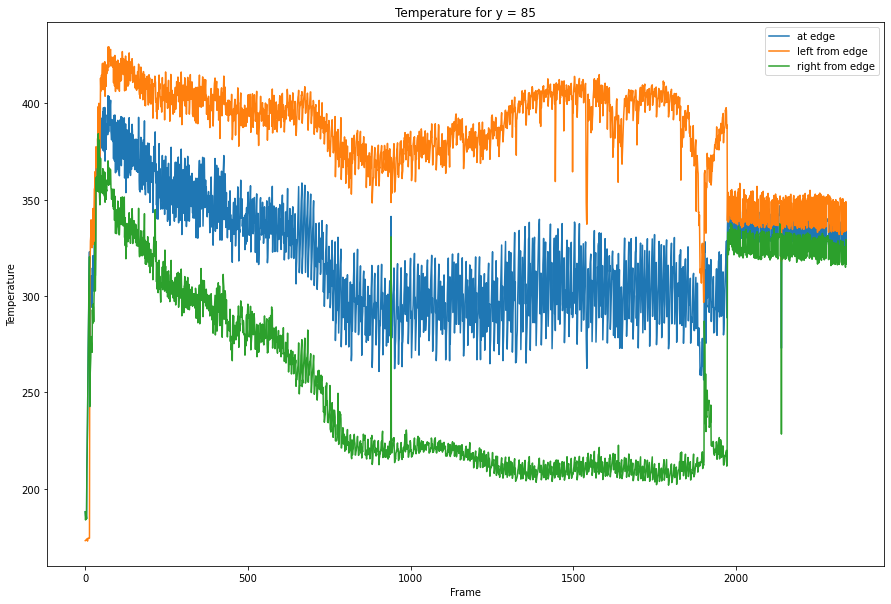

In [24]:
temperature_distribution('lfs_pmma_DE_6mm_tc_R2_0001',85)

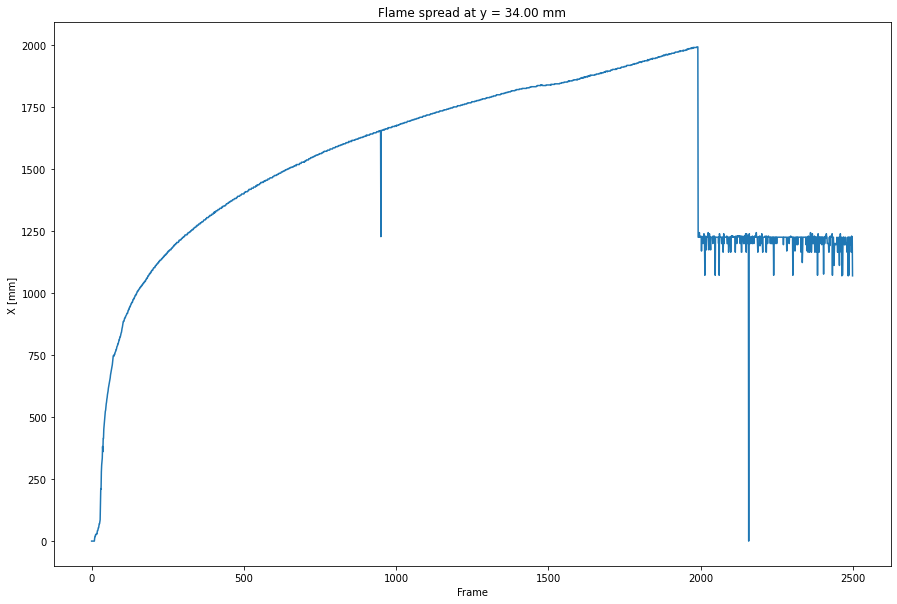

In [60]:
show_flame_spread('test',85)

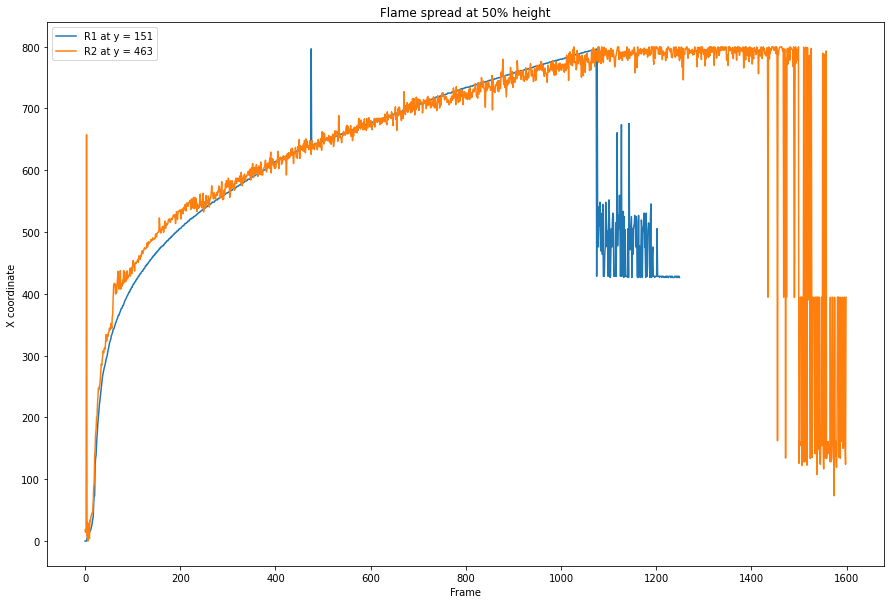

In [28]:
compare_two_experiments('lfs_pmma_DE_6mm_tc_R1_0001','lfs_pmma_DE_6mm_tc_R1_CANON',y_cutoff = 0.9)

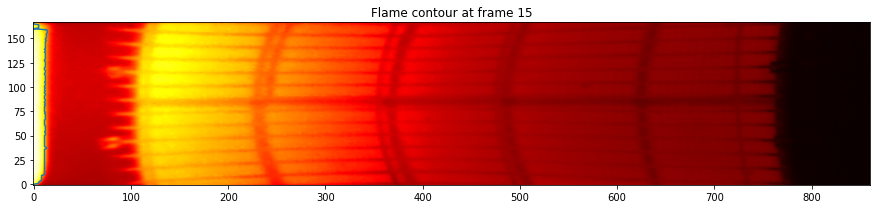

In [23]:
fig,ax =show_flame_contour('lfs_pmma_DE_6mm_tc_R1_0001',15)

(0.0, 2.0)

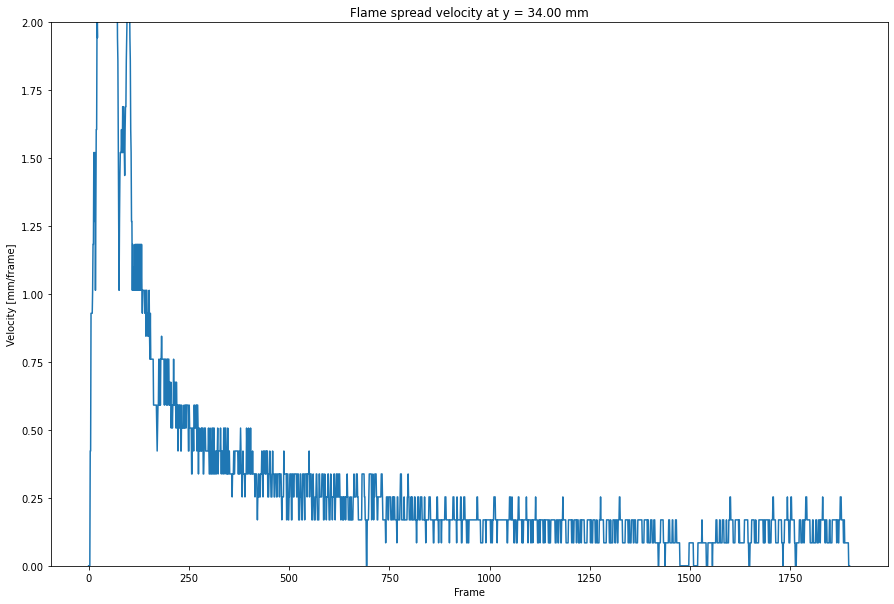

In [19]:
fig,ax =show_flame_spread_velocity(exp_name,85,cut_off = 1900,rolling_window =11)
ax.set_ylim(0,2)

In [74]:
test = get_edge_results('test')[:,85]

(0.0, 5.0)

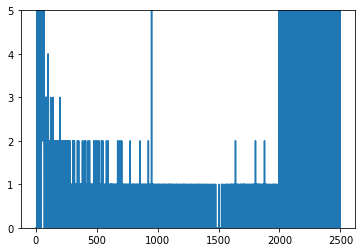

In [79]:
plt.plot(np.diff(test))
plt.ylim(0,5)

In [95]:
dh.close_file()